<a href="https://colab.research.google.com/github/flat35hd99/play-grad-writesvg/blob/master/scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install svgwrite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 656.4 kB/s eta 0:00:00


In [4]:
from svgwrite import Drawing, shapes
import random
from IPython.display import SVG, display

random.seed(1)

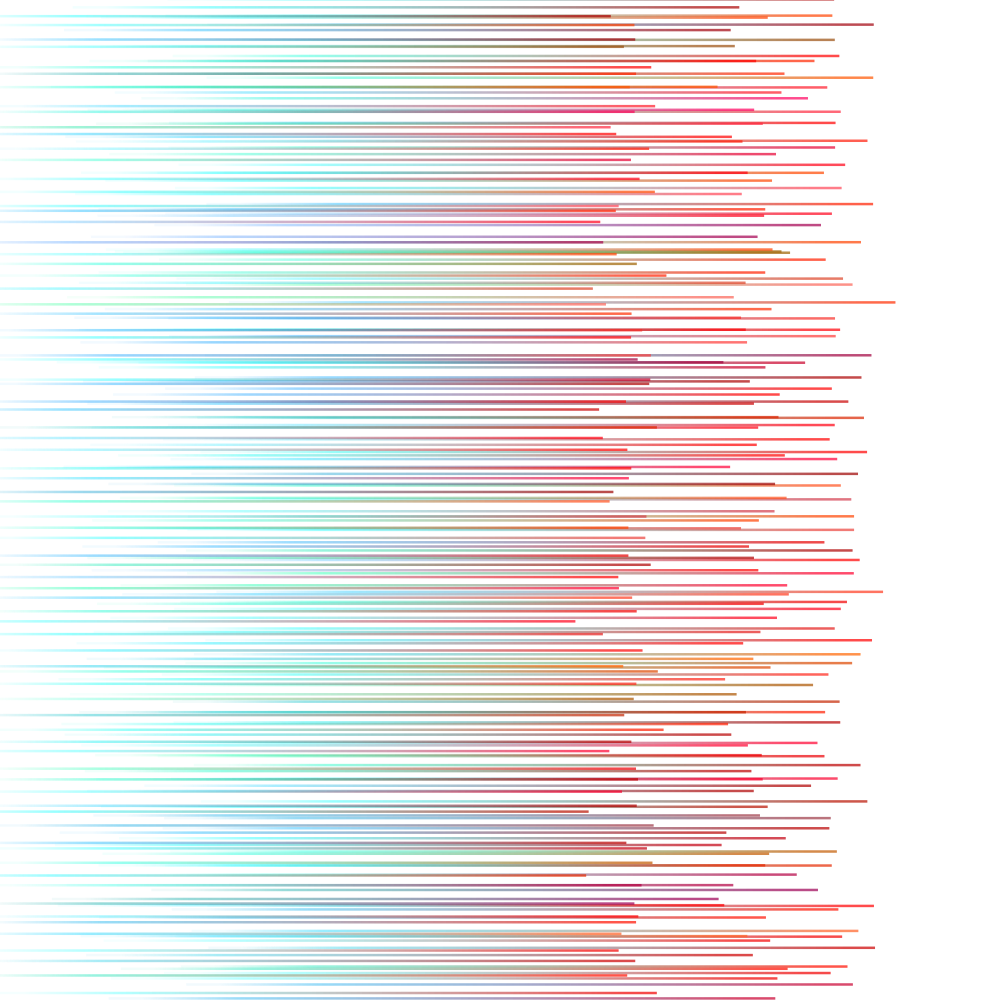

In [5]:
# 画像サイズと各長方形のサイズを設定
width = 1000
height = 1000
rect_width = width / 1.5
rect_height = height / 400

x_gauss_sigma = width / 50
y_base = - 10 #@param
y_base_shift = height / 100

# 描画オブジェクトを生成
dwg = Drawing('output.svg', size=(width, height))
dwg.defs.add(dwg.style("""\
  @import url('https://fonts.googleapis.com/css2?family=Roboto+Mono&display=swap');
  .label {
    font-size: 20px;
    font-family: 'Roboto Mono', monospace;
    text-anchor: middle;
  }
"""))

# dwg.add(dwg.rect(insert=(0,0), size=('100%', '100%'), fill='black'))

def get_random_color(base_color_code):
    rgb_code = base_color_code

    # RGBコードの文字列を3つの16進数の整数に変換
    r = int(rgb_code[0:2], 16)
    g = int(rgb_code[2:4], 16)
    b = int(rgb_code[4:6], 16)

    # ランダムなずれの最大値
    max_shift = 100

    r_shift = random.randint(-max_shift, max_shift)
    g_shift = random.randint(-max_shift, max_shift)
    b_shift = random.randint(-max_shift, max_shift)

    # RGBコードの各値にランダムなずれを加える
    r_new = max(0, min(255, r + r_shift))
    g_new = max(0, min(255, g + g_shift))
    b_new = max(0, min(255, g + b_shift))

    return hex(r_new)[2:].zfill(2) + hex(g_new)[2:].zfill(2) + hex(b_new)[2:].zfill(2)

# 各長方形のグラデーションの色を定義
colors = [(f"#{get_random_color('00FF00')}", f"#{get_random_color('FF0000')}") for _ in range(100)]

# 長方形を描画する関数
def draw_rect(x, y, start_color, end_color):
    # グラデーションを定義
    gradient = dwg.linearGradient()
    gradient.add_stop_color("5%", start_color, 0.05)
    gradient.add_stop_color("20%", start_color, 0.4)
    gradient.add_stop_color("95%", end_color, 0.7)
    dwg.defs.add(gradient)

    # 長方形を描画
    rect = shapes.Rect(insert=(x, y), size=(rect_width, rect_height), fill=gradient.get_paint_server())
    dwg.add(rect)

def get_random_y_shift():
    r = random.uniform(- y_base_shift/2, y_base_shift/2)
    return y_base_shift + r

def get_random_x_shift():
    r = random.gauss(0, x_gauss_sigma)
    return y_base_shift + r

for j in range(3):
    # 長方形たちを描画
    for i, (start_color, end_color) in enumerate(colors):
        # 各長方形の位置を計算
        x = rect_width + get_random_x_shift() - width/(2 - j * 0.3)
        y = y_base + i * (rect_height + y_base_shift) + get_random_y_shift() + (j * (rect_height + y_base_shift)/2)

        # 各長方形を描画
        draw_rect(x, y, start_color, end_color)

# 画像を保存
with open("output.svg", "w") as f:
    dwg.write(f, pretty=True)

display(SVG("output.svg"))